Object Tracking

In [1]:
#1: What is Tracking
#2: Tracking in Computer Vision
#3: Motion Model & Appearence Model
#4: OpenCV API Tracker Class

Motion Model --> "Motion Model Will Estimate the Position and Velocity in Particular Object in Pixel Co-ordinates. 
and Use That Information to Predict it's Location for Future Video Frames. 
Appearence Model --> Encodes with the Object looks Like and Then Search the Region around to Predicted Location 
From the Motion Model then Fine Tune the Location of The Object."

In [17]:
#Importing Libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode
import sys
import os
from matplotlib.animation import FuncAnimation
from zipfile import ZipFile
import urllib
from urllib.request import urlretrieve
%matplotlib inline

In [5]:
print(cv2.getBuildInformation())


General configuration for OpenCV 4.7.0 =====================================
  Version control:               4.7.0

  Platform:
    Timestamp:                   2023-02-22T13:19:52Z
    Host:                        Windows 10.0.17763 AMD64
    CMake:                       3.24.2
    CMake generator:             Visual Studio 14 2015
    CMake build tool:            MSBuild.exe
    MSVC:                        1900
    Configuration:               Debug Release

  CPU/HW features:
    Baseline:                    SSE SSE2 SSE3
      requested:                 SSE3
    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX AVX2
      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX
      SSE4_1 (16 files):         + SSSE3 SSE4_1
      SSE4_2 (1 files):          + SSSE3 SSE4_1 POPCNT SSE4_2
      FP16 (0 files):            + SSSE3 SSE4_1 POPCNT SSE4_2 FP16 AVX
      AVX (4 files):             + SSSE3 SSE4_1 POPCNT SSE4_2 AVX
      AVX2 (32 files):           + SSSE3 SSE4_1 

Goal

Text(0.5, 1.0, 'Object Tracking in OpenCV')

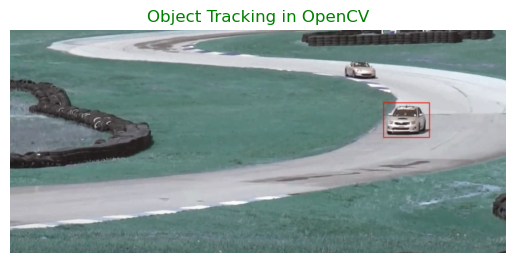

In [6]:
trackingImage = cv2.imread("tracking.png", cv2.IMREAD_COLOR)
plt.imshow(trackingImage)
plt.axis("off")
plt.title("Object Tracking in OpenCV", color = "green")

#Given the Initial Location of an Object, Tracking Location in Subsequent Frames

Tracker Class in OpenCV

In [7]:
#1: BOOSTING
#2: MIL
#3: KCF
#4: CSRT
#5: TLD --> Tends to recover from occulusions
#6: MEDIANFLOW --> Good for predictable slow motion
#7: GOTURN --> Deep Learning based, Most Accurate
#8: MOSSE --> Fastest

In [8]:
HTML(
    """<video width = 1024 controls>
    <source src = 'elements/race_car.mp4' type = 'video/mp4'></video""")

In [9]:
videoInputFile = "race_car.mp4"

In [10]:
def drawRectangle(frame, bbox):
    point1 = (int(bbox[0]), int(bbox[1]))
    point2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, point1, point2, (255, 0, 0), 2, 1)

In [11]:
def displayRectangle(frame, bbox):
    plt.figure(figsize = (20, 10))
    frameCopy = frame.copy()
    drawRectangle(frameCopy, bbox)
    frameCopy = cv2.cvtColor(frameCopy, cv2.COLOR_RGB2BGR)
    plt.imshow(frameCopy)
    plt.axis("off")

In [12]:
def drawText():
    cv2.putText(frame, txt, location, cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

(-0.5, 821.5, 399.5, -0.5)

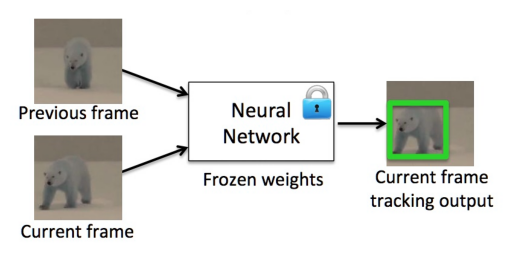

In [13]:
processImage = cv2.imread("process.jpg", cv2.IMREAD_COLOR)
plt.imshow(processImage)
plt.axis("off")

Create the Tracker Instance

In [15]:
#Set up Tracker
tracker_types = ["BOOSTING", "MIL", "KCF", "CSRT", "TLD", "MEDIANFLOW", "GOTURN", "MOSSE"]

#Change the index to change the tracker type
tracker_type = tracker_types[2]

if tracker_type == "BOOSTING":
    tracker = cv2.legacy.TrackerBoosting.create()
elif tracker_type == "MIL":
    tracker = cv2.legacy.TrackerMIL.create()
elif tracker_type == "CSRT":
    tracker = cv2.TrackerCSRT.create()
elif tracker_type == "TLD":
    tracker = cv2.legacy.TrackerTLD.create()
elif tracker_type == "MEDIANFLOW":
    tracker = cv2.legacy.TrackerMedianFlow.create()
elif tracker_type == "GOTURN":
    tracker = cv2.TrackerGOTURN.create()
else:
    tracker = cv2.TrackerMOSSE.create()
    

AttributeError: module 'cv2' has no attribute 'TrackerMOSSE'

In [ ]:
cv2.__version__

In [16]:
pip install opencv-contrib-python


  Using cached opencv_contrib_python-4.8.1.78-cp37-abi3-win_amd64.whl (44.8 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\nafiz\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [19]:
np.__version__

'1.21.5'